In [27]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
X = diabetes.data
y = diabetes.target
print(X.shape)

(442, 10)


In [29]:
print(y.shape)

(442,)


In [30]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [31]:
#plt.scatter(X[:,-1],y);
print(X[:,-1],y);

[-0.01764613 -0.09220405 -0.02593034 -0.00936191 -0.04664087 -0.09634616
 -0.03835666  0.00306441  0.01134862 -0.01350402 -0.03421455 -0.05906719
 -0.04249877 -0.01350402 -0.07563562 -0.04249877  0.02791705 -0.0010777
 -0.01764613 -0.05492509  0.01549073 -0.01764613 -0.01350402  0.13561183
 -0.05492509 -0.03421455 -0.0052198   0.04034337 -0.05492509  0.05276969
 -0.00936191 -0.04249877  0.02791705  0.00306441 -0.06735141  0.01963284
 -0.02593034 -0.0052198   0.02377494  0.00306441  0.09419076 -0.00936191
 -0.03421455  0.07348023 -0.01764613 -0.05078298 -0.08806194 -0.08391984
 -0.02178823 -0.01350402  0.00720652 -0.02178823 -0.01350402  0.04862759
  0.00720652  0.00720652 -0.01764613 -0.06735141 -0.05078298  0.01963284
 -0.03421455  0.01963284 -0.02593034 -0.07149352  0.01134862  0.01549073
  0.01963284  0.00306441  0.00306441  0.01963284  0.04034337  0.06105391
 -0.01764613 -0.00936191  0.07348023  0.02791705  0.01549073 -0.0010777
 -0.08391984 -0.02593034 -0.0052198  -0.0010777  -0.0

$y = \beta_0 + \beta_1x + \beta_2x^2$

In [32]:
## Compute X matrix
import numpy as np
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)
XX = poly_power(X[:,-1],2)
XX.shape

(442, 3)

In [33]:
beta = np.linalg.inv(XX.T.dot(XX)).dot(XX.T.dot(y))
beta

array([ 147.79417686,  600.31928736, 1917.97382756])

In [34]:
xpred = np.linspace(-0.15,0.15,100)
Xpred = poly_power(xpred,2)
Xpred.shape

(100, 3)

In [35]:
ypred = Xpred.dot(beta)

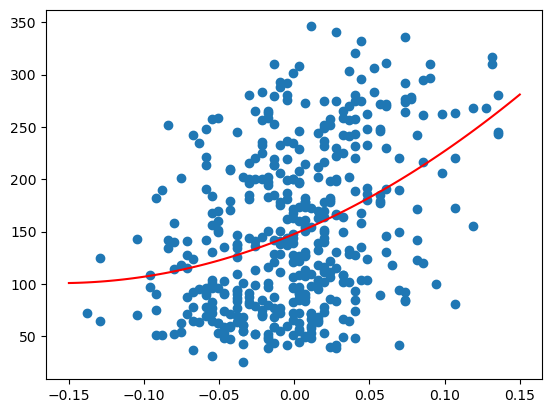

In [36]:
plt.scatter(X[:,-1],y)
plt.plot(xpred,ypred,color = 'r')
plt.show()

In [37]:
## Confidence Intervals
len(y)

442

$\widehat{std.dev}(\hat{y}_{pred}) = \hat{\sigma}\sqrt{X_{pred}(X^TX)^{-1} X^T_{pred}}\tag{1}$

In [38]:
## compute sigma hat
H = XX.dot(np.linalg.inv(XX.T.dot(XX))).dot(XX.T)
hii = np.diag(H)
e = y - XX.dot(beta)
var = np.linalg.norm(e)**2/(len(y) - 3)
std = np.sqrt(var)
std

71.1033670566515

In [39]:
a = np.linalg.inv(XX.T.dot(XX))
b = Xpred.dot(a).dot(Xpred.T)
b.shape

(100, 100)

In [40]:
var = np.diag(b)
std_vector = np.sqrt(var)
std_vector.shape

(100,)

In [41]:
std_dev = std*std_vector
std_dev.shape

(100,)

$$A $100(1 − α)\%$ Confidence Intervals for $\mathbb{E}(y_{pred})$ is

$$
\hat{y}_{pred} \pm  \widehat{std.dev}(\hat{y}_{pred})  \cdot t \Big(1 - \frac{\alpha}{2};n-p\Big)
$$


In [42]:
import scipy
n = 442
p = 3
alpha = 0.05
stdev_t = scipy.stats.t.ppf(1 - alpha/2.,n-p)*std_dev

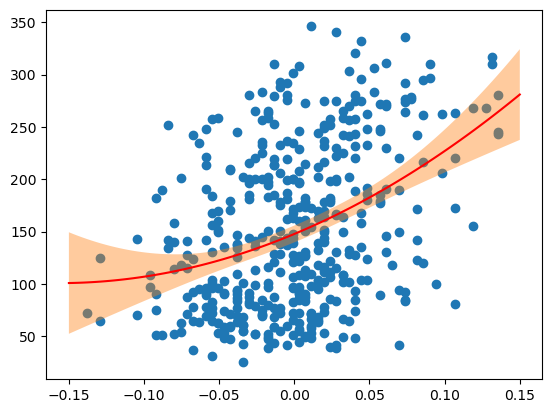

In [43]:
plt.scatter(X[:,-1],y)
plt.plot(xpred,ypred,color = 'r')
plt.fill_between(xpred,ypred-stdev_t,ypred+stdev_t,alpha = 0.4)
plt.show()